
### **Heart Disease Prediction**

1. **Load Dataset**

   • Load the Heart Disease dataset from a public CSV file or Kaggle.

2. **Preprocess the Data**

   • Drop irrelevant columns (e.g., id, patient number if present).

   • Fill missing values with mode/mean where appropriate.

   • Apply one-hot encoding to categorical features.

3. **EDA**

   • Calculate heart disease rate by chest pain type.

   • Provide one insight (e.g., relation between cholesterol level and disease).

4. **Model Training**

   • Use logistic regression or Random Forest.

   • Perform vectorized data handling.
   
   • Split the data (80/20).

   • Print model accuracy and ROC AUC score.



In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df=pd.read_csv('C:/Users/USER/Documents/Github/Machine Learning/datasets/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [2]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [3]:
df.drop(['thal','target'],axis=1,inplace=True)

In [4]:
x=df.groupby('age')['cp'].mean().nlargest(10)
print(x)

age
69    2.666667
38    2.333333
34    2.000000
37    2.000000
76    2.000000
68    1.500000
39    1.428571
51    1.410256
49    1.294118
59    1.282609
Name: cp, dtype: float64


<Axes: xlabel='age_group', ylabel='chol'>

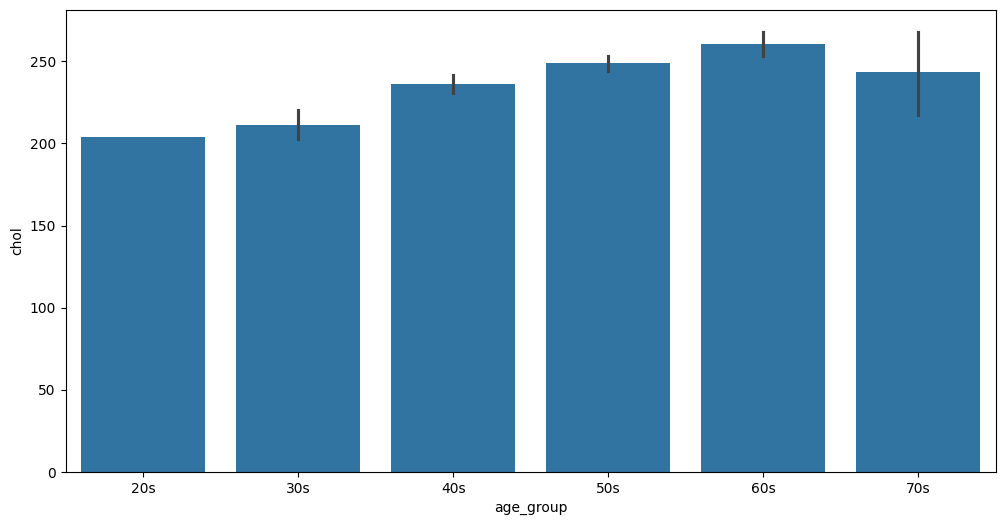

In [5]:
df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20s','30s','40s','50s','60s','70s'])

plt.figure(figsize=(12,6))
sns.barplot(data=df,x='age_group',y='chol')

In [6]:
numeric_cols=df.select_dtypes(include='number').columns
scaler=StandardScaler()
df[numeric_cols]=scaler.fit_transform(df[numeric_cols])

In [7]:
X=df.drop(['age','age_group'],axis=1)
y=df['age_group']

model=LogisticRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=11)

model.fit(X_train,y_train)
y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy : ",accuracy)



Accuracy :  0.45365853658536587
